In [1]:
import Contextual_Bandits_Tree_Class as cbdt

import pandas as pd
import numpy as np
import random
from timeit import default_timer as timer

### Load Simulation Data

In [2]:
simulation_data = pd.read_csv('simulation_data.csv')

In [3]:
simulation_data.head()

,Gender,AgeGroup,Program,Income,State,Device,OS,Browser,option,click
0,0,3.0,C,200447,NJ,Desktop,Apple,Chrome,A,0
1,0,3.0,D,473011,CA,Desktop,Windows,Chrome,A,0
2,0,4.0,D,337266,CA,Mobile,Apple,Chrome,A,0
3,1,1.0,E,167260,NJ,Desktop,Apple,Chrome,A,0
4,1,1.0,D,364587,CA,Tablet,Apple,Chrome,B,0


### Train/Test Split

In [4]:
def train_test_split(df, test_size):
    '''splits the data into training and testing sets based on size of requested test set'''

    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population = indices, k = test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)

    return train_df, test_df

In [5]:
train_df, test_df = train_test_split(simulation_data, .2)

### Train the Contextual Bandits Decision Tree

In [6]:
start = timer()
tree = cbdt.Contextual_Bandits_Tree(max_depth = 5).fit(train_df, click_column_name = 'click', option_column_name = 'option')
end = timer()
print('{} Seconds'.format(np.round(end - start,3)))

46.883 Seconds


### Evaluate the Contextual Bandits Decision Tree

In [7]:
pred_lift, pivot = tree.policy_evaluation(test_df, print_info = True)
pivot

Actual CTOR: 8.29%  Pred CTOR: 9.82%  Potential CTOR: 10.24%
Pred Lift: 18.46% Potential Lift 23.46%


,pred_node,opens_A,opens_B,clicks_A,clicks_B,mean_A,mean_B,pred_class,pred_p_value,A_prob,B_prob,B_weight,A_weight,mean_of_policy,total_opens,total_clicks,total_mean,total_incremental_clicks,potential_incremental_clicks
0,4,496,493,49,24,0.098790,0.048682,mean_A,0.00000,1.000,0.000,0.000000,0.098790,0.098790,989,73,0.073812,24.703629,24.703629
1,5,320,306,28,13,0.087500,0.042484,mean_A,0.00000,1.000,0.000,0.000000,0.087500,0.087500,626,41,0.065495,13.775000,13.775000
2,7,416,458,44,24,0.105769,0.052402,mean_A,0.00000,1.000,0.000,0.000000,0.105769,0.105769,874,68,0.077803,24.442308,24.442308
3,8,1716,1801,185,79,0.107809,0.043865,mean_A,0.00000,1.000,0.000,0.000000,0.107809,0.107809,3517,264,0.075064,115.163753,115.163753
4,12,306,338,31,25,0.101307,0.073964,mean_B,0.11658,0.086,0.914,0.067604,0.008712,0.076316,644,56,0.086957,-6.852516,9.241830
5,13,581,608,58,52,0.099828,0.085526,mean_B,0.06001,0.044,0.956,0.081763,0.004392,0.086156,1189,110,0.092515,-7.561010,8.695353
6,14,316,316,27,35,0.085443,0.110759,mean_A,0.64498,0.667,0.333,0.036883,0.056991,0.093873,632,62,0.098101,-2.672000,8.000000
7,16,431,419,47,44,0.109049,0.105012,mean_B,0.39663,0.229,0.771,0.080964,0.024972,0.105936,850,91,0.107059,-0.954095,1.691415
8,17,351,374,30,38,0.085470,0.101604,mean_A,0.06107,0.959,0.041,0.004166,0.081966,0.086132,725,68,0.093793,-5.554599,5.663102
9,20,339,328,37,41,0.109145,0.125000,mean_A,0.06750,0.952,0.048,0.006000,0.103906,0.109906,667,78,0.116942,-4.692962,5.375000


### Training Curves for the Contextual Bandits Decision Tree Algorithm

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train_lifts = []
test_lifts = []
training_times = []
for i in range(6):
    #print(i)
    start = timer()
    tree = cbdt.Contextual_Bandits_Tree(max_depth = i).fit(train_df)
    end = timer()
    training_times.append(np.round(end - start,3))  
    #print('train')
    train_lift, pivot = tree.policy_evaluation(train_df)
    #print('test')
    test_lift, pivot = tree.policy_evaluation(test_df)
    train_lifts.append(train_lift)
    test_lifts.append(test_lift)

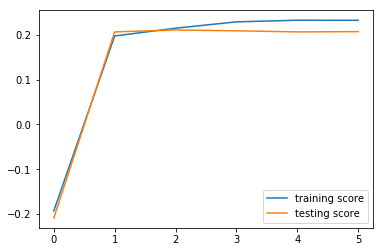

In [11]:
plt.plot(train_lifts, label = 'training score')
plt.plot(test_lifts, label = 'testing score')
plt.legend()

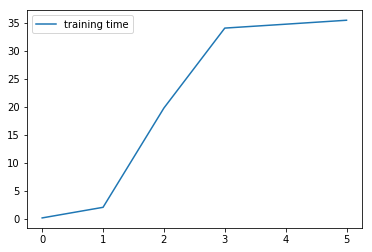

In [12]:
plt.plot(training_times, label = 'training time')
plt.legend()

### Generate Python Dictionary version of Tree

In [8]:
tree_dict = tree.get_tree_dict()
print(tree_dict)

{'Gender == 1': {'yes': {'Device == Mobile': {'yes': {'Income <= 171319': {'yes': {'Income <= 124507': {'yes': {'node_id': 4, 'choice': 'A', 'incremental_clicks': 135.0, 'p_value': 9.582068049752191e-16, 'pivot': {'A': {'opens': 2026.0, 'clicks': 221.0, 'mean': 0.10908193484698914, 'prob_of_choice': 1.0}, 'B': {'opens': 2030.0, 'clicks': 86.0, 'mean': 0.042364532019704436, 'prob_of_choice': 0.0}}}, 'no': {'node_id': 5, 'choice': 'A', 'incremental_clicks': 91.0, 'p_value': 2.78229290261247e-10, 'pivot': {'A': {'opens': 1254.0, 'clicks': 154.0, 'mean': 0.12280701754385964, 'prob_of_choice': 1.0}, 'B': {'opens': 1298.0, 'clicks': 68.0, 'mean': 0.05238828967642527, 'prob_of_choice': 0.0}}}}}, 'no': {'Income <= 237030': {'yes': {'node_id': 7, 'choice': 'A', 'incremental_clicks': 77.0, 'p_value': 1.4986593572955446e-07, 'pivot': {'A': {'opens': 1841.0, 'clicks': 170.0, 'mean': 0.09234111895708853, 'prob_of_choice': 1.0}, 'B': {'opens': 1716.0, 'clicks': 81.0, 'mean': 0.0472027972027972, 'pro